In [3]:
import pandas as pd

# Carga los CSV que tienes en data/
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

# Vemos cuántas filas y columnas tiene cada uno
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (19237, 18)
Test shape: (8245, 18)


In [4]:
print("Columnas y tipos de datos en train:")
print(train.dtypes)
print("\nColumnas del train:")
print(train.columns.tolist())

Columnas y tipos de datos en train:
ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

Columnas del train:
['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags']


In [5]:
print("\nValores nulos por columna en train:")
print(train.isnull().sum())


Valores nulos por columna en train:
ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


In [6]:
print("\nEstadísticas numéricas de train:")
print(train.describe())


Estadísticas numéricas de train:
                 ID         Price    Prod. year     Cylinders       Airbags
count  1.923700e+04  1.923700e+04  19237.000000  19237.000000  19237.000000
mean   4.557654e+07  1.855593e+04   2010.912824      4.582991      6.582627
std    9.365914e+05  1.905813e+05      5.668673      1.199933      4.320168
min    2.074688e+07  1.000000e+00   1939.000000      1.000000      0.000000
25%    4.569837e+07  5.331000e+03   2009.000000      4.000000      4.000000
50%    4.577231e+07  1.317200e+04   2012.000000      4.000000      6.000000
75%    4.580204e+07  2.207500e+04   2015.000000      4.000000     12.000000
max    4.581665e+07  2.630750e+07   2020.000000     16.000000     16.000000


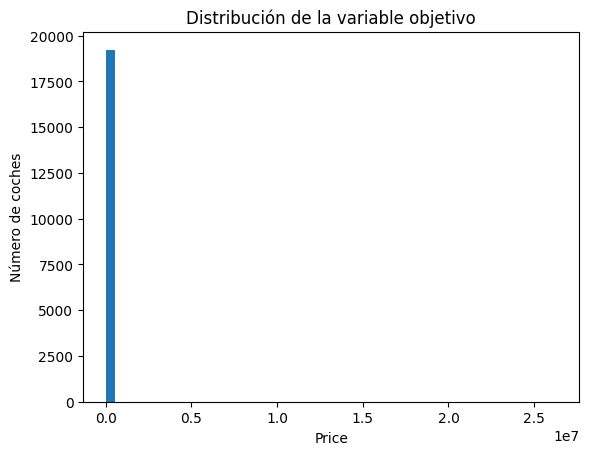


Descripción de price:


KeyError: 'price'

In [ ]:
import matplotlib.pyplot as plt

plt.hist(train['Price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Número de coches')
plt.title('Distribución de la variable objetivo')
plt.show()

print("\nDescripción de price:")
print(train['Price'].describe())

In [ ]:
print("\nConteo de marcas de coches (top 10):")
print(train['make'].value_counts().head(10))